In [1]:
import numpy as np
import pingouin as pg

np.random.seed(927)
mean, cov, n = [7, 58], [(1, .7),(.7, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

# T-test
pg.ttest(x, y)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-202.999878,58,two-sided,2.021121e-84,"[-51.33, -50.33]",52.414343,7.431e+79,1.0


In [4]:
pg.corr(x,y)

,n,r,CI95%,p-val,BF10,power
pearson,30,0.688492,"[0.44, 0.84]",0.000026,1032.675,0.993586


In [5]:
print(pg.normality(x))

          W      pval  normal
0  0.986164  0.955304    True


<AxesSubplot:xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

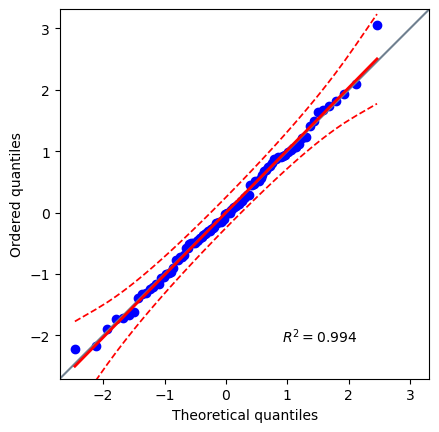

In [6]:
z = np.random.normal(size = 100)
pg.qqplot(z, dist='norm')

In [7]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')

# Run the ANOVA
aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
print(aov)

   Source          SS   DF        MS         F   p-unc       np2
0   Group    5.459963    1  5.459963  5.243656  0.0232  0.028616
1  Within  185.342729  178  1.041251       NaN     NaN       NaN


In [8]:
# Compute the two-way mixed ANOVA and export to a .csv file
aov = pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time',
                     subject='Subject', correction=False, effsize="np2")
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        5.460      1     58  5.460  5.052    0.028  0.080  nan
Time         7.628      2    116  3.814  4.027    0.020  0.065    0.999
Interaction  5.167      2    116  2.584  2.728    0.070  0.045  nan



In [10]:
# Compute the two-way mixed ANOVA and export to a .csv file
aov = pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time',
                     subject='Subject', correction=False, effsize="np2")
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        5.460      1     58  5.460  5.052    0.028  0.080  nan
Time         7.628      2    116  3.814  4.027    0.020  0.065    0.999
Interaction  5.167      2    116  2.584  2.728    0.070  0.045  nan



In [11]:
# Pairwise correlations between columns of a dataframe
import pandas as pd
np.random.seed(927)
z = np.random.normal(0, 1, 30)
data = pd.DataFrame({'X': x, 'Y': y, 'Z': z})
pg.pairwise_corr(data, columns=['X', 'Y', 'Z'], method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,X,Y,pearson,two-sided,30,0.688492,"[0.44, 0.84]",0.000026,1032.675,0.993586
1,X,Z,pearson,two-sided,30,0.060644,"[-0.31, 0.41]",0.750228,0.238,0.061294
2,Y,Z,pearson,two-sided,30,-0.023361,"[-0.38, 0.34]",0.902478,0.229,0.051225


In [12]:
# Multiple linear regression
pg.linear_regression(data[['X', 'Z']], data['Y'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,52.976423,0.946978,55.942602,1.853395e-29,0.478276,0.43963,51.033384,54.919461
1,X,0.685024,0.137769,4.972251,3.281365e-05,0.478276,0.43963,0.402344,0.967703
2,Z,-0.061652,0.131376,-0.469280,6.426371e-01,0.478276,0.43963,-0.331213,0.207909
